In [1]:
library(tidyverse)
library(readr)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_url  <- "https://raw.githubusercontent.com/Elijah-Lal/DSCI-100-Group-17-Project-Final-Report/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Elijah-Lal/DSCI-100-Group-17-Project-Final-Report/refs/heads/main/sessions.csv"

dir.create("data", showWarnings = FALSE)

download.file(players_url,  destfile = "data/players.csv", mode = "wb")
download.file(sessions_url, destfile = "data/sessions.csv", mode = "wb")

players  <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Compute session counts
per_player <- sessions |>
  group_by(hashedEmail) |>
  summarize(
    session_count = n(),
    .groups = "drop"
  )

# Join with players
data <- players |>
  left_join(per_player, by = "hashedEmail") |>
  mutate(session_count = replace_na(session_count, 0))

data <- data |>
  mutate(HighActivity = session_count >= 2)

In [4]:
data <- data |>
  mutate(HighActivity = session_count >= 2)

In [5]:
data_clean <- data |>
  filter(!is.na(Age)) |>
  mutate(
    gender = factor(gender),
    experience = factor(experience),
    subscribe = factor(subscribe)
  ) |>
  select(HighActivity, Age, gender, experience, subscribe)

Figure 1

In [6]:
summary_stats <- data |>
  summarize(
    mean_age = mean(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    mean_sessions = mean(session_count),
    sd_sessions = sd(session_count)
  )

summary_stats

mean_age,sd_age,mean_sessions,sd_sessions
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,7.831633,33.48244


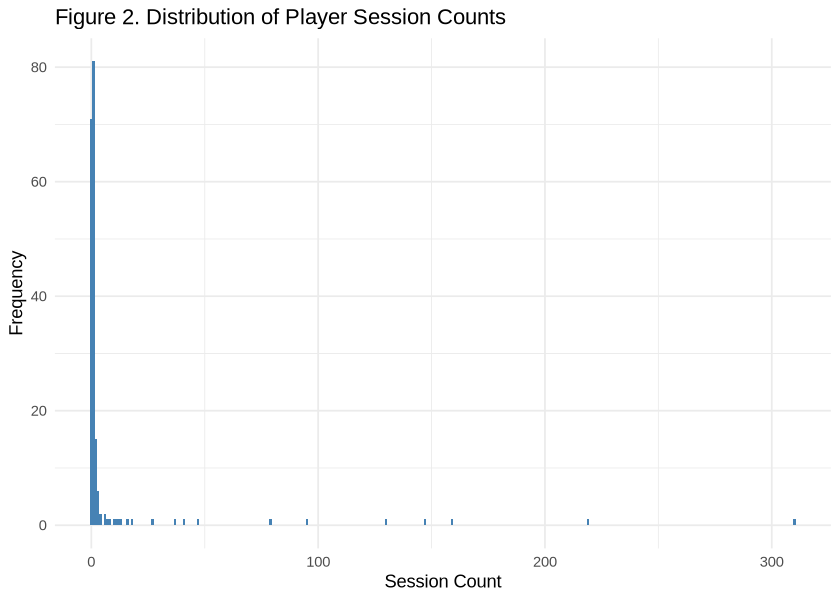

In [11]:
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(data, aes(x = session_count)) +
  geom_histogram(binwidth = 1, fill = "steelblue") +
  labs(
    title = "Figure 2. Distribution of Player Session Counts",
    x = "Session Count",
    y = "Frequency"
  ) +
  theme_minimal()

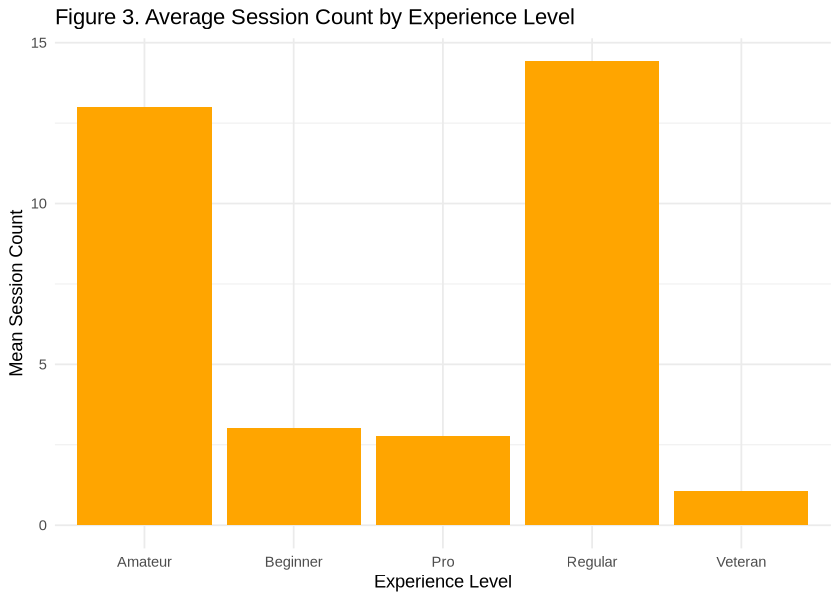

In [10]:
ggplot(data, aes(x = experience, y = session_count)) +
  geom_bar(stat = "summary", fun = "mean", fill = "orange") +
  labs(
    title = "Figure 3. Average Session Count by Experience Level",
    x = "Experience Level",
    y = "Mean Session Count"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


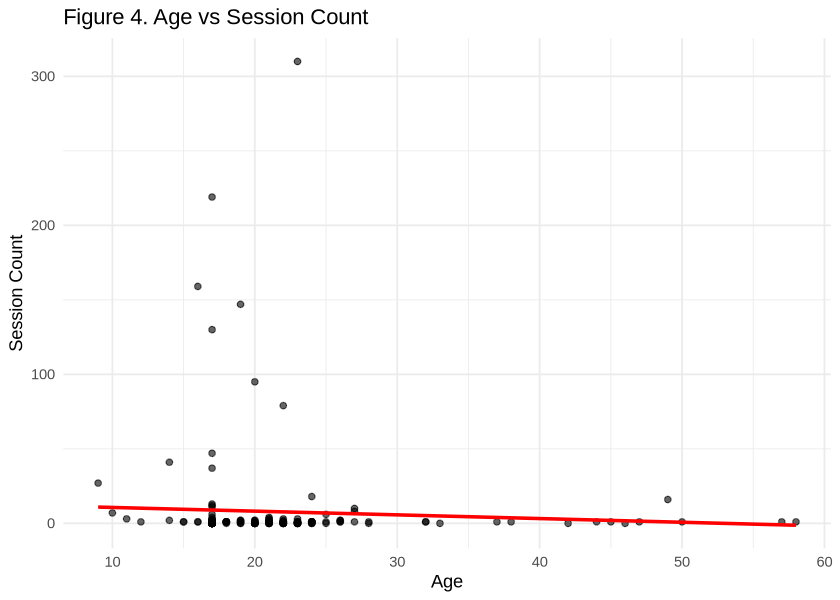

In [15]:
ggplot(data, aes(x = Age, y = session_count)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(
    title = "Figure 4. Age vs Session Count",
    x = "Age",
    y = "Session Count"
  ) +
  theme_minimal()